In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.symlink('/content/drive/My Drive/고급머신비전_전선검출/', '/content/고급머신비전_전선검출')

In [ ]:
cd /content/고급머신비전_전선검출/

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def drawhoughLinesOnImage(image, houghLines):
    for lines in houghLines:
      for line in lines :
        rho, theta = line
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),1)

# Different weights are added to the image to give a feeling of blending
def blend_images(image, final_image, alpha=0.7, beta=1., gamma=0.):
    return cv2.addWeighted(final_image, alpha, image, beta,gamma)

In [ ]:
image = cv2.imread('./PLDM Dataset/train/8.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
bilateralFilter_gray_image = cv2.bilateralFilter(gray_image, 9, 75, 75)
edgeImage = cv2.Canny(bilateralFilter_gray_image, 60, 120)
edges_filtered = cv2.Canny(edgeImage, 60, 120)

In [ ]:
# Detect points that form a line
dis_reso = 1
theta = np.pi /180
threshold = 170
maxLineGap = 30

In [ ]:
houghLines = cv2.HoughLines(edges_filtered, dis_reso, theta, threshold,maxLineGap)
houghLinesImage = np.zeros_like(image)

In [ ]:
draw_P_houghLinesOnImage(houghLinesImage, houghLines) # draw the lines on the empty image
orginalImageWithHoughLines = blend_images(houghLinesImage,image) # add two images together, using image blending

> <ipython-input-213-b8f645d0967a>(4)draw_P_houghLinesOnImage()
-> rho, theta = line[index][0]
(Pdb) line[index]
*** NameError: name 'line' is not defined
(Pdb) houghLines[index][0]
array([185.,   0.], dtype=float32)
(Pdb) q


BdbQuit: ignored

(-0.5, 359.5, 539.5, -0.5)

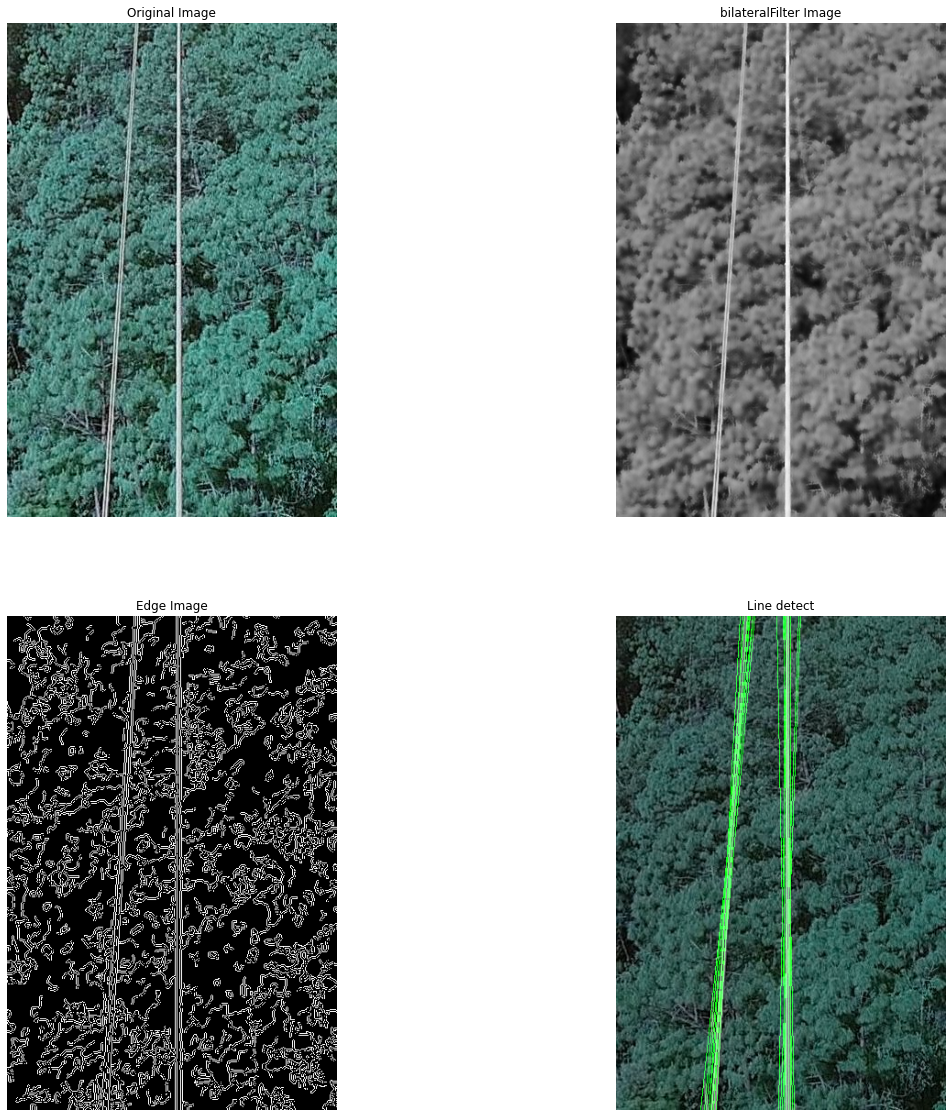

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(bilateralFilter_gray_image, cmap='gray')
ax2.set_title('bilateralFilter Image')
ax2.axis('off')

ax3.imshow(edges_filtered, cmap='gray')
ax3.set_title('Edge Image')
ax3.axis('off')

ax4.imshow(orginalImageWithHoughLines)
ax4.set_title('Line detect')
ax4.axis('off')

In [ ]:
image = cv2.imread('./PLDU Dataset/aug_data/0.0_0/646.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
bilateralFilter_gray_image = cv2.bilateralFilter(gray_image, 9, 75, 75)
# blurredImage = cv2.GaussianBlur(gray_image, (5, 5), 0)
edgeImage = cv2.Canny(bilateralFilter_gray_image, 60, 120)
edges_filtered = cv2.Canny(edgeImage, 60, 120)

In [ ]:
# Detect points that form a line
dis_reso = 1
theta = np.pi /180
threshold = 150
maxLineGap = 50

In [ ]:
houghLines = cv2.HoughLines(edges_filtered, dis_reso, theta, threshold,maxLineGap)
houghLinesImage = np.zeros_like(image)

In [ ]:
drawhoughLinesOnImage(houghLinesImage, houghLines) # draw the lines on the empty image
orginalImageWithHoughLines = blend_images(houghLinesImage,image) # add two images together, using image blending

(-0.5, 359.5, 539.5, -0.5)

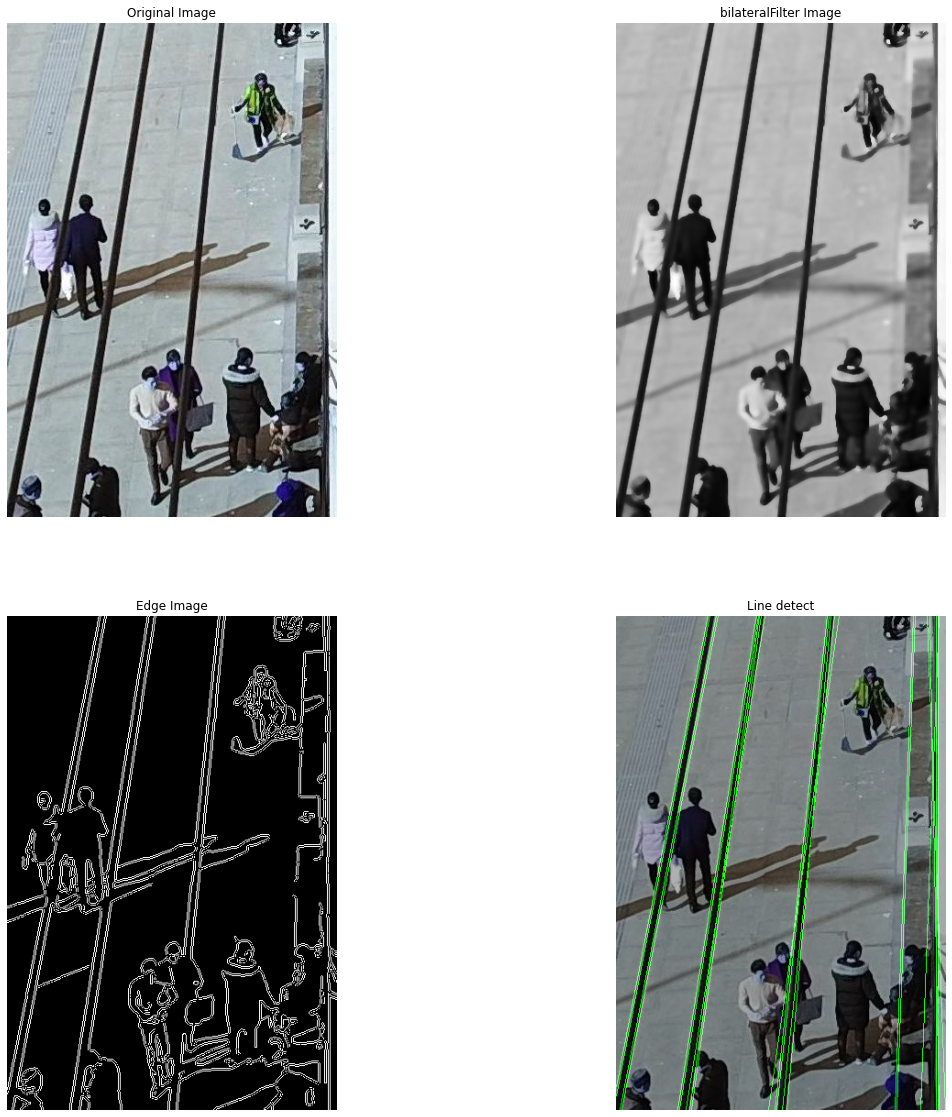

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

ax1.imshow(image)
ax1.set_title('Original Image')
ax1.axis('off')

ax2.imshow(bilateralFilter_gray_image, cmap='gray')
ax2.set_title('bilateralFilter Image')
ax2.axis('off')

ax3.imshow(edges_filtered, cmap='gray')
ax3.set_title('Edge Image')
ax3.axis('off')

ax4.imshow(orginalImageWithHoughLines)
ax4.set_title('Line detect')
ax4.axis('off')

In [ ]:
## 매트랩 파일로 작성된 GT 불러오기

from scipy import io

mat_file = io.loadmat('/content/고급머신비전_전선검출/PLDU Dataset/train/477.mat')
gt = mat_file['groundTruth'][0][0][0][0][0]

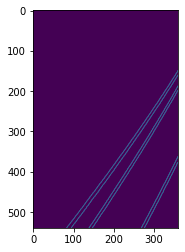

In [ ]:
## 불러온 GT 나타내기

fig = plt.figure()
plt.imshow(gt)

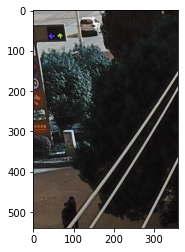

In [ ]:
## 불러온 GT에 대응되는 이미지

image = cv2.imread('/content/고급머신비전_전선검출/PLDU Dataset/train/477.jpg')
fig = plt.figure()
plt.imshow(image)

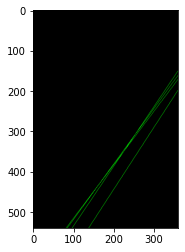

In [ ]:
## 해당 이미지를 통해서 Line Detection 진행

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
bilateralFilter_gray_image = cv2.bilateralFilter(gray_image, 9, 75, 75)
# blurredImage = cv2.GaussianBlur(gray_image, (5, 5), 0)
edgeImage = cv2.Canny(bilateralFilter_gray_image, 60, 120)
edges_filtered = cv2.Canny(edgeImage, 60, 120)

# Detect points that form a line
dis_reso = 1
theta = np.pi /180
threshold = 170

houghLines = cv2.HoughLines(edges_filtered, dis_reso, theta, threshold)
houghLinesImage = np.zeros_like(image)

drawhoughLinesOnImage(houghLinesImage, houghLines) # draw the lines on the empty image

fig = plt.figure()
plt.imshow(houghLinesImage)

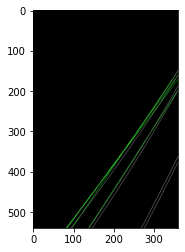

In [ ]:
## 실제 모델이 검출한 라닝과 GT를 함께 표현 (오른쪽 아래 선이 검출하지 못한 GT)

rgb_gt = cv2.cvtColor(gt*255,cv2.COLOR_GRAY2RGB)
GT_Detection = blend_images(houghLinesImage,rgb_gt)

fig = plt.figure()
plt.imshow(GT_Detection)

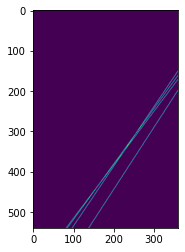

In [ ]:
## 모델이 검출한 line을 이진 이미지로 표현함

gray_detection_line = cv2.cvtColor(houghLinesImage,cv2.COLOR_RGB2GRAY)
ret, gray_detection_line = cv2. threshold(gray_detection_line,1,1,cv2.THRESH_BINARY)
fig = plt.figure()
plt.imshow(gray_detection_line)

In [ ]:
gray_detection_line[0,0]
gt[0,0]

0

In [ ]:
TP = 0
FN = 0
FP = 0
TN = 0

for h in range(gray_detection_line.shape[0]) :
  for w in range(gray_detection_line.shape[1]) :

    if gray_detection_line[h,w] and gt[h,w] is 0 :
      TN = TN +1
    elif gray_detection_line[h,w] == 1 and gt[h,w] != 1 :
      FN = FN +1
    elif gray_detection_line[h,w] != 1 and gt[h,w] == 1 :
      FP = FP + 1
    elif gray_detection_line[h,w] == 1 and gt[h,w] == 1 :
      TP = TP + 1

In [ ]:
precision = TP/(TP+FP)
Recall = TP/(TP+FN)

In [ ]:
precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("Precision : {}".format(precision))
print("Recall : {}".format(Recall))

Precision : 0.10932297447280799
Recall : 0.13902611150317573


In [ ]:
!pip install pylsd-nova

     |████████████████████████████████| 163kB 5.3MB/s 
  Created wheel for pylsd-nova: filename=pylsd_nova-1.2.0-cp36-none-any.whl size=159702 sha256=5502109e3233d98ff9a5dc280a4562214f77729d0fdd4398e5e74d478e2a1bfa
  Stored in directory: /root/.cache/pip/wheels/e8/22/d0/411a255bf8ff6226a5e9209ecf9e34d66b3310984aaee2fbaa
Successfully built pylsd-nova


In [ ]:
from pylsd import lsd

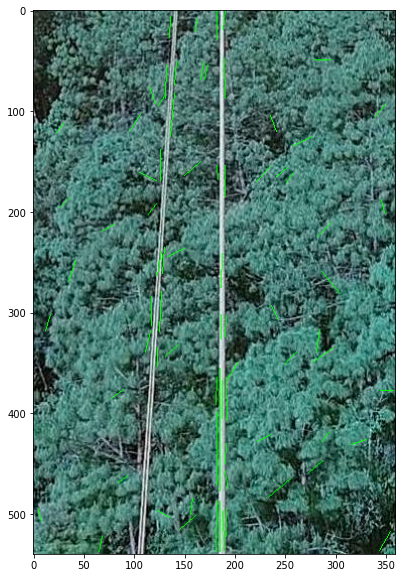

In [ ]:
img = cv2.imread('./PLDM Dataset/train/8.jpg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

bilateralFilter_gray_image = cv2.bilateralFilter(img_gray, 9, 75, 75)
edgeImage = cv2.Canny(bilateralFilter_gray_image, 60, 120)
edges_filtered = cv2.Canny(edgeImage, 60, 120)

segments = lsd(edges_filtered, scale=0.5)

for i in range(segments.shape[0]):
    pt1 = (int(segments[i, 0]), int(segments[i, 1]))
    pt2 = (int(segments[i, 2]), int(segments[i, 3]))
    width = segments[i, 4]
    cv2.line(img, pt1, pt2, (0, 255, 0), 1)

fig = plt.figure(figsize=(10, 10))
plt.imshow(img)

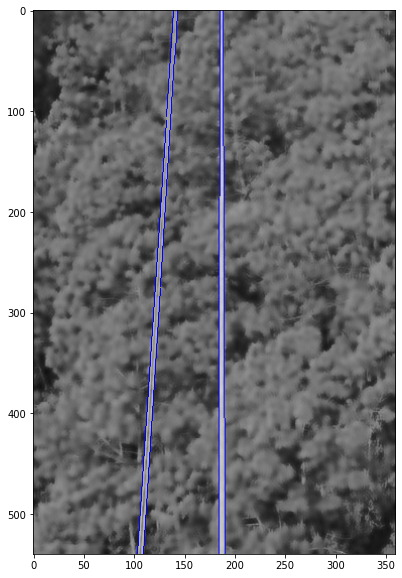

In [ ]:
fld = cv2.ximgproc.createFastLineDetector(_length_threshold=40)
img = cv2.imread('./PLDM Dataset/train/8.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
bilateralFilter_gray_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

lines = fld.detect(bilateralFilter_gray_image)
result_img = fld.drawSegments(bilateralFilter_gray_image,lines)

fig = plt.figure(figsize=(10, 10))
plt.imshow(result_img)

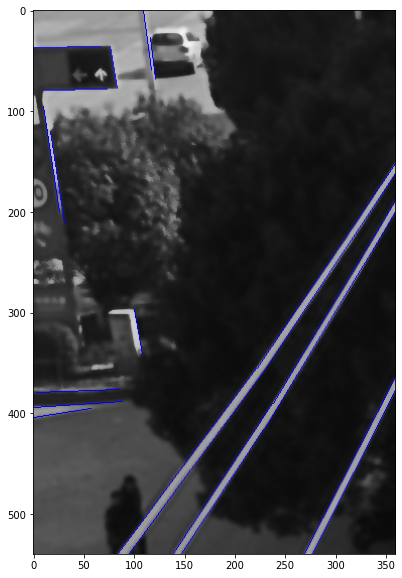

In [ ]:
fld = cv2.ximgproc.createFastLineDetector(_length_threshold=40)
img = cv2.imread('/content/고급머신비전_전선검출/PLDU Dataset/train/477.jpg')
gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
bilateralFilter_gray_image = cv2.bilateralFilter(gray_image, 9, 75, 75)

lines = fld.detect(bilateralFilter_gray_image)
result_img = fld.drawSegments(bilateralFilter_gray_image,lines)

fig = plt.figure(figsize=(10, 10))
plt.imshow(result_img)

In [ ]:
import glob
from tqdm import tqdm

In [ ]:
lst_file = glob.glob('/content/고급머신비전_전선검출/PLDU Dataset/test/*.jpg')

In [ ]:
fld = cv2.ximgproc.createFastLineDetector(_length_threshold=40)
TP = 0
FN = 0
FP = 0
TN = 0

max_recall = 0 
max_precision = 0

best_recall_img = cv2.imread('/content/고급머신비전_전선검출/PLDM Dataset/train/477.jpg')
best_precision_img = cv2.imread('/content/고급머신비전_전선검출/PLDM Dataset/train/477.jpg')

for index in tqdm(range(len(lst_file))) :

  t_TP = 0
  t_FN = 0
  t_FP = 0
  t_TN = 0

  file = lst_file[index] 
  mat_file = io.loadmat(file[:-4]+'.mat')
  gt = mat_file['groundTruth'][0][0][0][0][0]

  img = cv2.imread(file)
  gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  lines = fld.detect(gray_image)
  FLDLinesImage = np.zeros_like(img)

  for line in lines :

    x1 = line[0][0]
    y1 = line[0][1]
    x2 = line[0][2]
    y2 = line[0][3]

    cv2.line(FLDLinesImage,(x1,y1),(x2,y2),(0,255,0),1)

  gray_detection_line = cv2.cvtColor(FLDLinesImage,cv2.COLOR_RGB2GRAY)
  ret, gray_detection_line = cv2. threshold(gray_detection_line,1,1,cv2.THRESH_BINARY)

  for h in range(gray_detection_line.shape[0]) :
    for w in range(gray_detection_line.shape[1]) :

      if gray_detection_line[h,w] and gt[h,w] is 0 :
        TN = TN +1
        t_TP = t_TP +1
      elif gray_detection_line[h,w] == 1 and gt[h,w] != 1 :
        FN = FN +1
        t_FN = t_FN +1
      elif gray_detection_line[h,w] != 1 and gt[h,w] == 1 :
        FP = FP + 1
        t_FP = t_FP + 1
      elif gray_detection_line[h,w] == 1 and gt[h,w] == 1 :
        TP = TP + 1
        t_TP = t_TP + 1

  t_precision = t_TP/(t_TP+t_FP)
  t_Recall = t_TP/(t_TP+t_FN)

  if t_Recall > max_recall :
    best_recall_img = fld.drawSegments(img,lines)
    max_recall = t_Recall
    print("Best_Recall : ",t_Recall)
  
  if t_precision > max_precision :
    best_precision_img = fld.drawSegments(img,lines)
    max_precision = t_precision
    print("Best_Precision : ",max_precision)

precision = TP/(TP+FP)
Recall = TP/(TP+FN)

print("Precision : {}".format(precision))
print("Recall : {}".format(Recall))



  0%|          | 0/120 [00:00<?, ?it/s]

  1%|          | 1/120 [00:01<03:07,  1.58s/it]

Best_Recall :  0.3132817153067302
Best_Precision :  0.12857492055732095




  2%|▏         | 2/120 [00:03<03:06,  1.58s/it]

Best_Precision :  0.24259259259259258




  2%|▎         | 3/120 [00:04<03:03,  1.57s/it]

Best_Recall :  0.477124183006536
Best_Precision :  0.5062413314840499




  3%|▎         | 4/120 [00:06<03:01,  1.56s/it]

  4%|▍         | 5/120 [00:07<02:59,  1.56s/it]

  5%|▌         | 6/120 [00:09<02:58,  1.57s/it]

Best_Precision :  0.5515887183148875




  6%|▌         | 7/120 [00:10<02:57,  1.57s/it]

Best_Precision :  0.6152866242038216




  7%|▋         | 8/120 [00:12<02:55,  1.56s/it]

  8%|▊         | 9/120 [00:14<02:54,  1.58s/it]

  8%|▊         | 10/120 [00:15<02:52,  1.57s/it]

  9%|▉         | 11/120 [00:17<02:50,  1.57s/it]

 10%|█         | 12/120 [00:18<02:48,  1.56s/it]

 11%|█         | 13/120 [00:20<02:47,  1.56s/it]

 12%|█▏        | 14/120 [00:21<02:45,  1.56s/it]

Best_Precision :  0.6580824088748018




 12%|█▎        | 15/120 [00:23<02:45,  1.58s/it]

 13%|█▎        | 16/120 [00:25<02:44,  1.59s/it]

 14%|█▍        | 17/120 [00:26<02:42,  1.58s/it]

 15%|█▌        | 18/120 [00:28<02:41,  1.58s/it]

 16%|█▌        | 19/120 [00:29<02:40,  1.59s/it]

 17%|█▋        | 20/120 [00:31<02:39,  1.59s/it]

 18%|█▊        | 21/120 [00:33<02:36,  1.58s/it]

 18%|█▊        | 22/120 [00:34<02:35,  1.58s/it]

 19%|█▉        | 23/120 [00:36<02:32,  1.57s/it]

 20%|██        | 24/120 [00:37<02:30,  1.57s/it]

Best_Recall :  0.48238747553816047




 21%|██        | 25/120 [00:39<02:28,  1.57s/it]

 22%|██▏       | 26/120 [00:40<02:27,  1.56s/it]

Best_Recall :  0.48717948717948717




 22%|██▎       | 27/120 [00:42<02:25,  1.56s/it]

 23%|██▎       | 28/120 [00:44<02:24,  1.57s/it]

 24%|██▍       | 29/120 [00:45<02:23,  1.58s/it]

 25%|██▌       | 30/120 [00:47<02:22,  1.58s/it]

 26%|██▌       | 31/120 [00:48<02:22,  1.60s/it]

Best_Recall :  0.5257323832145685




 27%|██▋       | 32/120 [00:50<02:22,  1.62s/it]

 28%|██▊       | 33/120 [00:52<02:21,  1.63s/it]

 28%|██▊       | 34/120 [00:53<02:20,  1.63s/it]

Best_Recall :  0.532484076433121
Best_Precision :  0.7420118343195267




 29%|██▉       | 35/120 [00:55<02:18,  1.63s/it]

 30%|███       | 36/120 [00:57<02:17,  1.64s/it]

Best_Recall :  0.5670289855072463




 31%|███       | 37/120 [00:58<02:15,  1.63s/it]

 32%|███▏      | 38/120 [01:00<02:11,  1.61s/it]

 32%|███▎      | 39/120 [01:01<02:08,  1.59s/it]

 33%|███▎      | 40/120 [01:03<02:06,  1.58s/it]

 34%|███▍      | 41/120 [01:04<02:04,  1.57s/it]

 35%|███▌      | 42/120 [01:06<02:03,  1.58s/it]

 36%|███▌      | 43/120 [01:08<02:01,  1.58s/it]

 37%|███▋      | 44/120 [01:09<01:59,  1.57s/it]

 38%|███▊      | 45/120 [01:11<01:58,  1.58s/it]

 38%|███▊      | 46/120 [01:12<01:56,  1.58s/it]

 39%|███▉      | 47/120 [01:14<01:55,  1.58s/it]

 40%|████      | 48/120 [01:16<01:54,  1.59s/it]

 41%|████      | 49/120 [01:17<01:53,  1.60s/it]

 42%|████▏     | 50/120 [01:19<01:50,  1.58s/it]

 42%|████▎     | 51/120 [01:20<01:49,  1.58s/it]

 43%|████▎     | 52/120 [01:22<01:46,  1.56s/it]

 44%|████▍     | 53/120 [01:23<01:44,  1.55s/it]

 45%|████▌     | 54/120 [01:25<01:42,  1.55s/it]

 46%|████▌     | 55/120 [01:26<01:41,  1.56s/it]

 47%|████▋     | 56/120 [01:28<01:38,  1.54s/it]

Precision : 0.3097606078945599
Recall : 0.24959700469506463


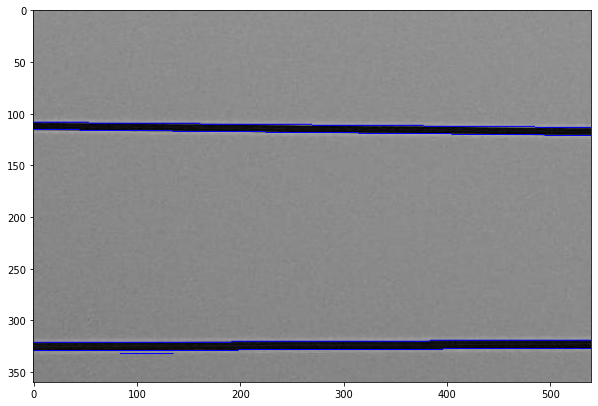

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(best_recall_img)

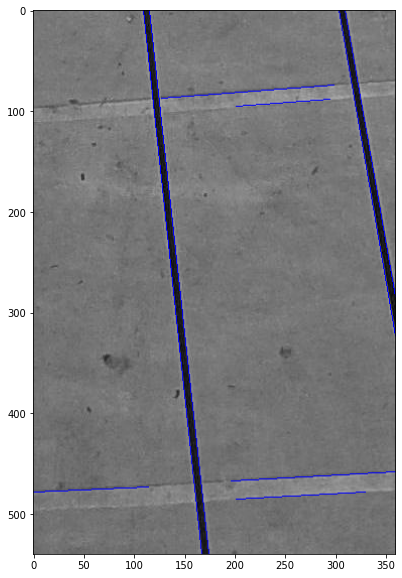

In [ ]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(best_precision_img)

In [ ]:
print(max_recall)
print(max_precision)

0.5670289855072463
0.7420118343195267
